# draw my year

Create a program that calls the load function from the first exercise, loads the files "income_per_person_gdppercapita_ppp_inflation_adjusted.csv" and "life_expectancy_years.csv",
and displays the projection of life expectancy in relation to the gross national product of
the year 1900 for each country.
Your graph must have a title, a legend for each axis and a legend for each graph.
You must display the year 1900.

In [53]:
# init
import pandas as pd
from matplotlib import pyplot as plt
from load_csv import load


In [54]:
# load income data
df_income = load('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
if (df_income is None):
    print("Error loading income data")
    exit()
print(df_income)

Loading dataset of dimensions (195, 252)
                  country  1800  1801  1802  1803  1804  1805  1806  1807  \
0             Afghanistan   683   683   683   683   683   683   683   683   
1                  Angola   700   702   705   709   711   714   718   721   
2                 Albania   755   755   755   755   755   756   756   756   
3                 Andorra  1360  1360  1360  1360  1370  1370  1370  1370   
4    United Arab Emirates  1130  1130  1140  1140  1150  1150  1160  1160   
..                    ...   ...   ...   ...   ...   ...   ...   ...   ...   
190                 Samoa  1590  1590  1590  1590  1590  1590  1590  1590   
191                 Yemen   993   995   998  1000  1000  1010  1010  1010   
192          South Africa  1780  1760  1740  1720  1700  1610  1610  1750   
193                Zambia   751   753   755   756   758   760   762   764   
194              Zimbabwe   984   985   986   987   988   989   991   992   

     1808  ...   2041   2042   204

In [55]:
# load lifespan data
df_lifespan = load('life_expectancy_years.csv')
if (df_lifespan is None):
    print("Error loading lifespan data")
    exit()
print(df_lifespan)

Loading dataset of dimensions (195, 302)
                  country  1800  1801  1802  1803  1804  1805  1806  1807  \
0             Afghanistan  28.2  28.2  28.2  28.2  28.2  28.2  28.1  28.1   
1                  Angola  27.0  27.0  27.0  27.0  27.0  27.0  27.0  27.0   
2                 Albania  35.4  35.4  35.4  35.4  35.4  35.4  35.4  35.4   
3                 Andorra   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4    United Arab Emirates  30.7  30.7  30.7  30.7  30.7  30.7  30.7  30.7   
..                    ...   ...   ...   ...   ...   ...   ...   ...   ...   
190                 Samoa  25.4  25.4  25.4  25.4  25.4  25.4  25.4  25.4   
191                 Yemen  23.4  23.4  23.4  23.4  23.4  23.4  23.4  23.4   
192          South Africa  33.5  33.5  33.5  33.5  33.5  33.5  33.5  33.5   
193                Zambia  32.6  32.6  32.6  32.6  32.6  32.6  32.6  32.6   
194              Zimbabwe  33.7  33.7  33.7  33.7  33.7  33.7  33.7  33.7   

     1808  ...  2091  2092  2093  

In [56]:
# index by country

if df_income is None or df_lifespan is None:
    print("Error: df_income or df_lifespan is not loaded.")
    exit()

df_income.set_index('country', inplace=True)
df_lifespan.set_index('country', inplace=True)

print(df_income)
print(df_lifespan)

                      1800  1801  1802  1803  1804  1805  1806  1807  1808  \
country                                                                      
Afghanistan            683   683   683   683   683   683   683   683   683   
Angola                 700   702   705   709   711   714   718   721   725   
Albania                755   755   755   755   755   756   756   756   756   
Andorra               1360  1360  1360  1360  1370  1370  1370  1370  1380   
United Arab Emirates  1130  1130  1140  1140  1150  1150  1160  1160  1160   
...                    ...   ...   ...   ...   ...   ...   ...   ...   ...   
Samoa                 1590  1590  1590  1590  1590  1590  1590  1590  1590   
Yemen                  993   995   998  1000  1000  1010  1010  1010  1020   
South Africa          1780  1760  1740  1720  1700  1610  1610  1750  1530   
Zambia                 751   753   755   756   758   760   762   764   765   
Zimbabwe               984   985   986   987   988   989   991  

In [57]:
# filter out data for 1900

if df_income is None or df_lifespan is None:
    print("Error: df_income or df_lifespan is not loaded.")
    exit()

df_income_1900 = df_income.loc[:, '1900']
df_lifespan_1900 = df_lifespan.loc[:, '1900']
print("Income dtype", df_income_1900.dtypes)
print("Lifespan dtype", df_lifespan_1900.dtypes)


Income dtype int64
Lifespan dtype float64


In [58]:
# merge and clean data
df = pd.concat([df_income_1900, df_lifespan_1900], axis='columns')
df.columns = ['income', 'lifespan']
df = df.dropna()
print(df)

                      income  lifespan
country                               
Afghanistan             1050      33.3
Angola                   779      32.6
Albania                 1270      34.9
United Arab Emirates    3310      35.4
Argentina               5330      37.2
...                      ...       ...
Samoa                   2090      27.4
Yemen                   1320      26.6
South Africa            1740      36.0
Zambia                   957      34.3
Zimbabwe                1110      35.3

[186 rows x 2 columns]


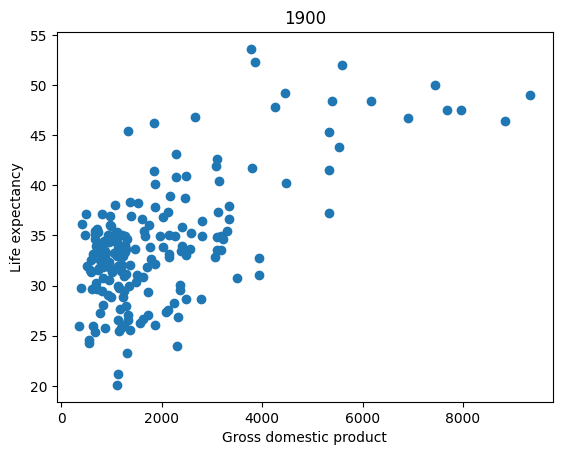

In [59]:
# plot the data

plt.scatter(df['income'], df['lifespan'])
plt.xlabel('Gross domestic product')
plt.ylabel('Life expectancy')
plt.title('1900')
plt.show()